In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
schools = pd.read_csv("schools.csv")

In [3]:
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [17]:
len(schools)

375

In [20]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
 7   total_SAT        375 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 23.6+ KB


In [4]:
# To print the schools with the best math scores which is 640 and above
best_math_schools = schools[schools["average_math"] >=640][["school_name", "average_math"]].sort_values("average_math", ascending= False)
best_math_schools

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


C:\Users\user222\AppData\Local\Temp\ipykernel_16084\3034919342.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent clipping of labels


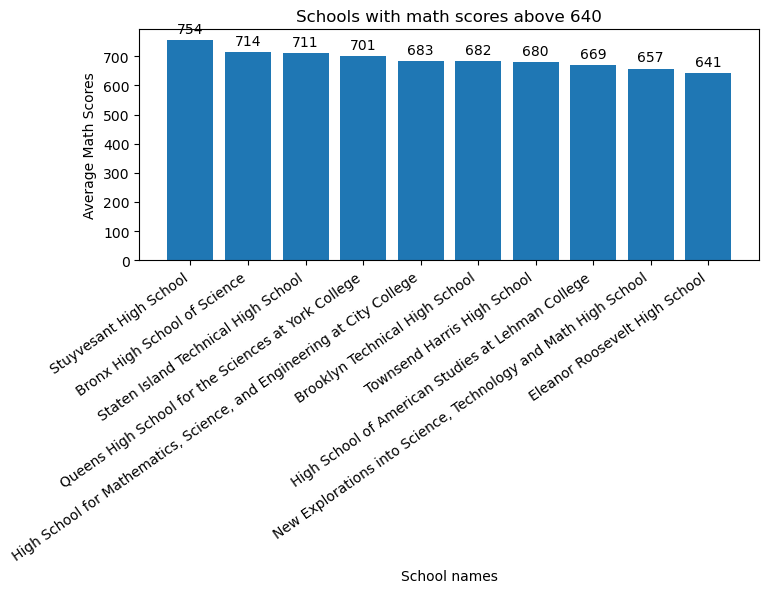

In [5]:
# Plotting the data
plt.figure(figsize=(8, 3))
bars = plt.bar(best_math_schools['school_name'], best_math_schools['average_math'])


# Rotate the x-axis labels
plt.xticks(rotation=35, ha='right')  # Rotate 45 degrees and align to the right

# Adding labels and title
plt.xlabel('School names')
plt.ylabel('Average Math Scores')
plt.title('Schools with math scores above 640')

# Adding values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Save the plot as a PNG file
plt.savefig('Schools with high math scores.png', format='png')
plt.show()

In [6]:
# Finding the total scores when the subjects are added together
schools["total_SAT"]= schools["average_math"] + schools["average_reading"] + schools["average_writing"]

# Sort by total_SAT
schools_sorted = schools.sort_values(by="total_SAT", ascending=False)
schools_sorted.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,total_SAT
88,Stuyvesant High School,Manhattan,M477,754,697,693,97.4,2144
170,Bronx High School of Science,Bronx,X445,714,660,667,97.0,2041
93,Staten Island Technical High School,Staten Island,R440,711,660,670,99.7,2041
174,High School of American Studies at Lehman College,Bronx,X905,669,672,672,91.8,2013
333,Townsend Harris High School,Queens,Q515,680,640,661,97.1,1981


In [7]:
# Finding the top 10 schools
top_10_schools = schools.groupby("school_name", as_index= False)["total_SAT"].mean().sort_values("total_SAT", ascending = False).head(10)
top_10_schools

,school_name,total_SAT
325,Stuyvesant High School,2144.0
324,Staten Island Technical High School,2041.0
55,Bronx High School of Science,2041.0
188,High School of American Studies at Lehman College,2013.0
334,Townsend Harris High School,1981.0
293,Queens High School for the Sciences at York Co...,1947.0
30,Bard High School Early College,1914.0
83,Brooklyn Technical High School,1896.0
121,Eleanor Roosevelt High School,1889.0
180,"High School for Mathematics, Science, and Engi...",1889.0


C:\Users\user222\AppData\Local\Temp\ipykernel_16084\3105939407.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent clipping of labels


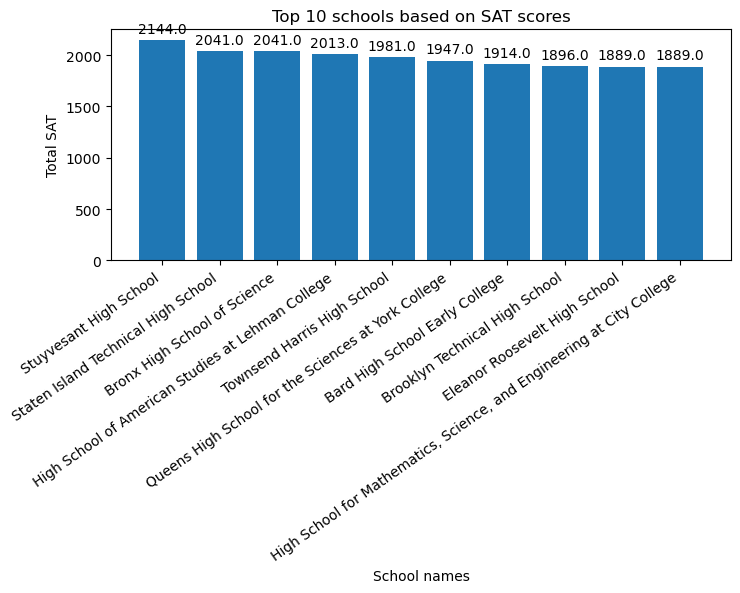

In [8]:
# Plotting the data for top 10 schools
plt.figure(figsize=(8, 3))
bars = plt.bar(top_10_schools['school_name'], top_10_schools['total_SAT'])


# Rotate the x-axis labels
plt.xticks(rotation=35, ha='right')  # Rotate 45 degrees and align to the right

# Adding labels and title
plt.xlabel('School names')
plt.ylabel('Total SAT')
plt.title('Top 10 schools based on SAT scores')

# Adding values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Save the plot as a PNG file
plt.savefig('Top 10 schools with SAT.png', format='png')
plt.show()

In [9]:
# Finding the bottom 10 schools
bottom_10_schools = schools.groupby("school_name", as_index= False)["total_SAT"].mean().sort_values("total_SAT", ascending = True).head(10)
bottom_10_schools

,school_name,total_SAT
279,Pan American International High School at Monroe,924.0
262,Multicultural High School,926.0
211,International High School at Prospect Heights,946.0
278,Pan American International High School,978.0
223,Kingsbridge International High School,987.0
208,International Community High School,995.0
56,Bronx International High School,1005.0
235,Manhattan Academy for Arts and Language,1005.0
359,W. H. Maxwell Career and Technical Education H...,1009.0
195,High School of Language and Innovation,1016.0


C:\Users\user222\AppData\Local\Temp\ipykernel_16084\2219708392.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent clipping of labels


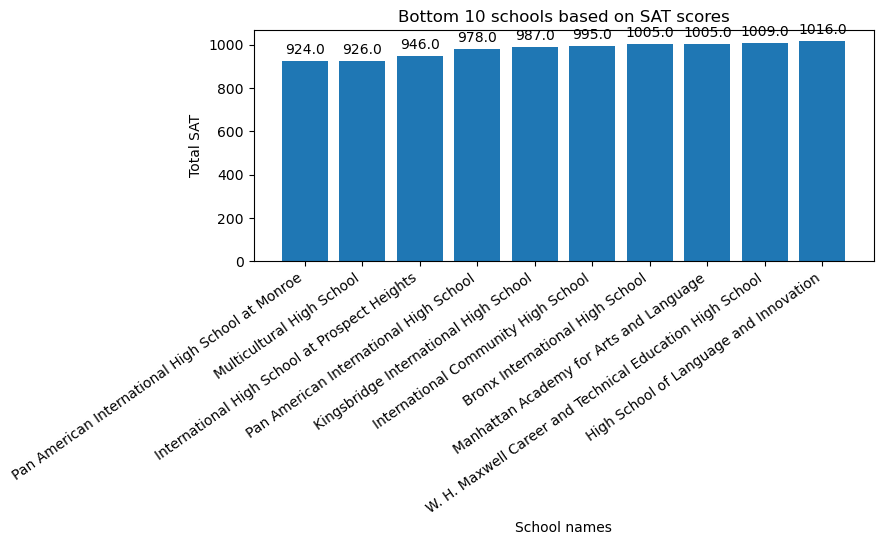

In [10]:
# Plotting the data for bottom 10 schools
plt.figure(figsize=(8, 3))
bars = plt.bar(bottom_10_schools['school_name'], bottom_10_schools['total_SAT'])


# Rotate the x-axis labels
plt.xticks(rotation=35, ha='right')  # Rotate 45 degrees and align to the right

# Adding labels and title
plt.xlabel('School names')
plt.ylabel('Total SAT')
plt.title('Bottom 10 schools based on SAT scores')

# Adding values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Save the plot as a PNG file
plt.savefig('Bottom 10 schools with SAT.png', format='png')
plt.show()

In [11]:
# Grouping the schools by borough to determine the boroughs that are doing well
boroughs = schools.groupby("borough")["total_SAT"].agg(["count", "mean", "std"]).round(2)
boroughs = boroughs.rename(columns = {"count":"num_schools", "mean": "average_SAT", "std": "std_SAT"})
boroughs

,num_schools,average_SAT,std_SAT
borough,,,
Bronx,98,1202.72,150.39
Brooklyn,109,1230.26,154.87
Manhattan,89,1340.13,230.29
Queens,69,1345.48,195.25
Staten Island,10,1439.00,222.30


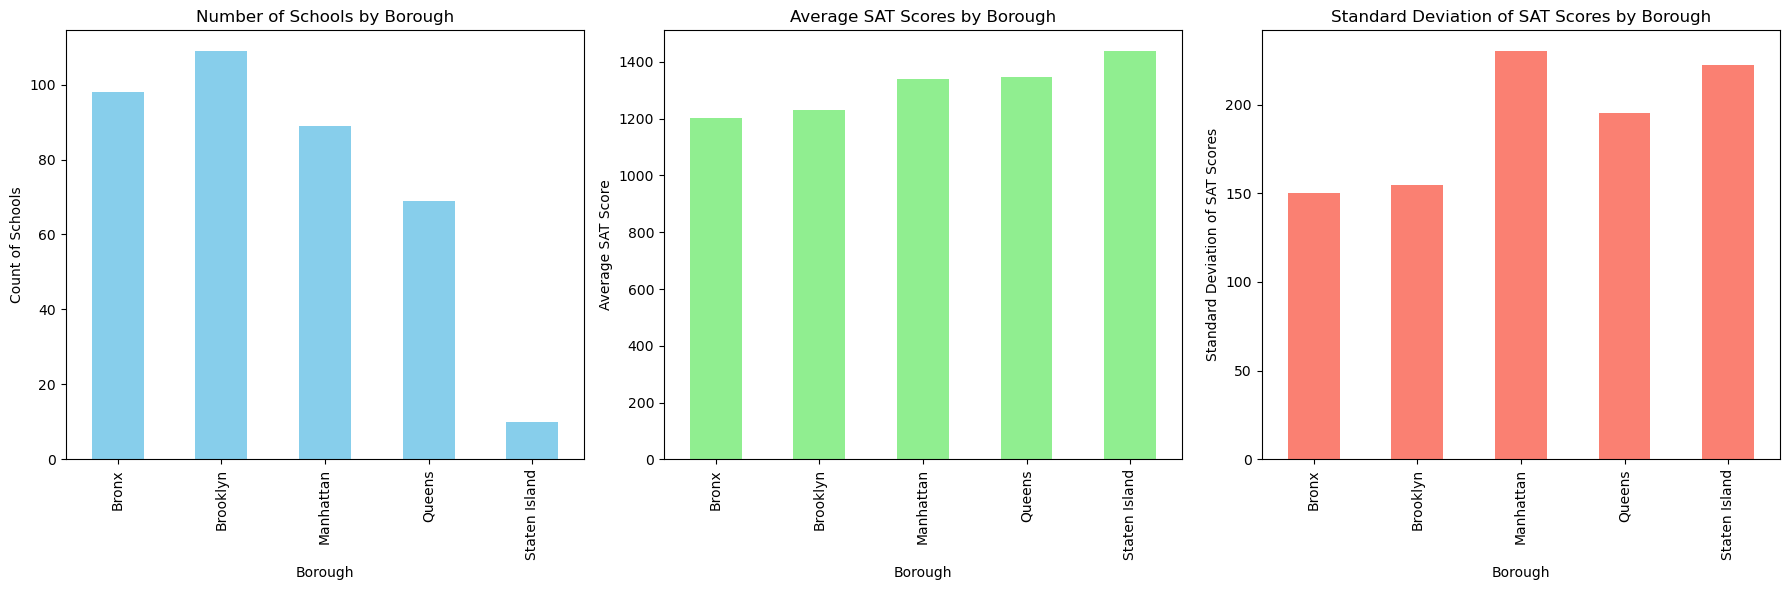

In [12]:
# Visualizing the data without value labels
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Bar chart for count_SAT
boroughs['num_schools'].plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Number of Schools by Borough')
ax[0].set_xlabel('Borough')
ax[0].set_ylabel('Count of Schools')

# Bar chart for average_SAT
boroughs['average_SAT'].plot(kind='bar', ax=ax[1], color='lightgreen')
ax[1].set_title('Average SAT Scores by Borough')
ax[1].set_xlabel('Borough')
ax[1].set_ylabel('Average SAT Score')

# Bar chart for std_SAT
boroughs['std_SAT'].plot(kind='bar', ax=ax[2], color='salmon')
ax[2].set_title('Standard Deviation of SAT Scores by Borough')
ax[2].set_xlabel('Borough')
ax[2].set_ylabel('Standard Deviation of SAT Scores')

plt.tight_layout()
plt.show()

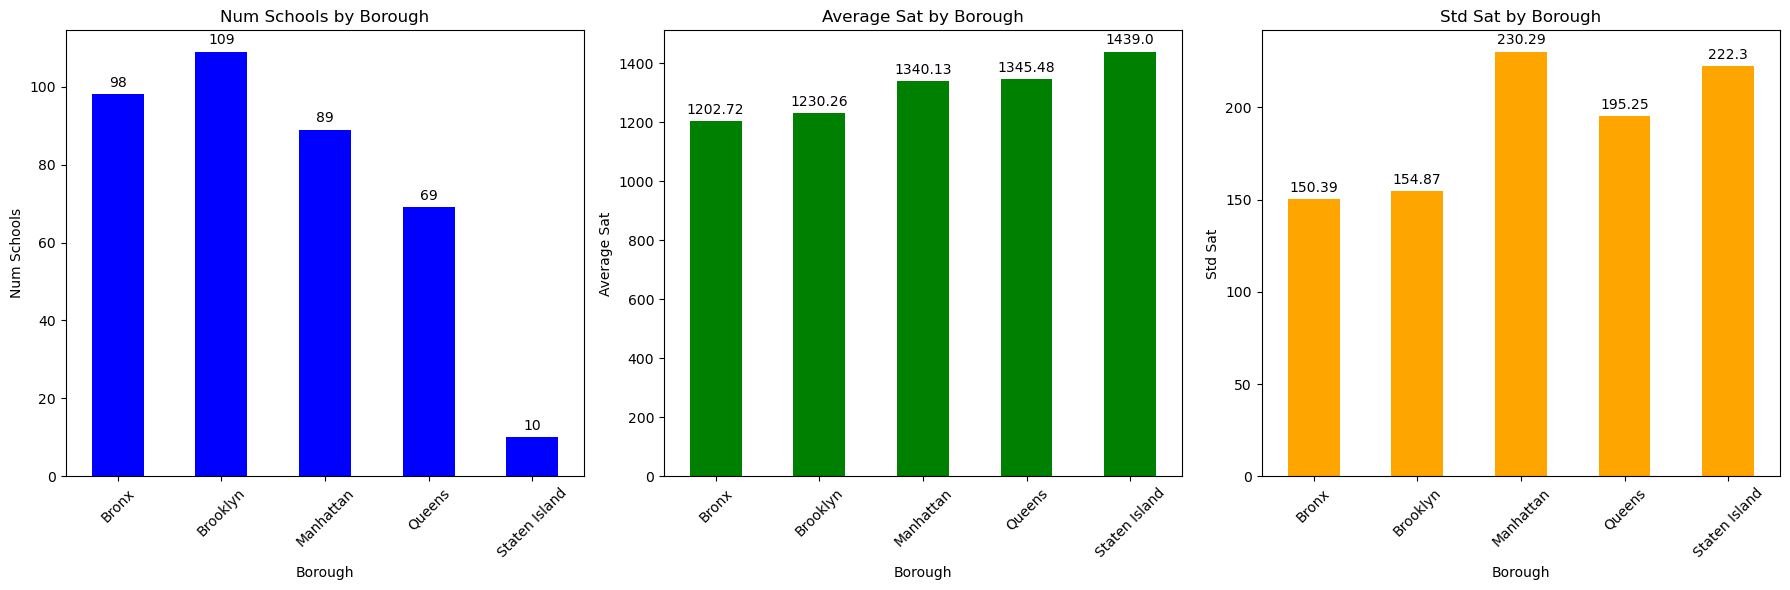

In [13]:
# Visualizing the data with value labels
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plotting and adding labels
for i, col in enumerate(['num_schools', 'average_SAT', 'std_SAT']):
    bars = boroughs[col].plot(kind='bar', ax=ax[i], color=['blue', 'green', 'orange'][i])
    ax[i].set_title(f'{col.replace("_", " ").title()} by Borough')
    ax[i].set_xlabel('Borough')
    ax[i].set_ylabel(col.replace("_", " ").title())
    ax[i].tick_params(axis='x', rotation=45)
    
    # Adding value labels on the bars
    for bar in bars.containers[0]:
        height = bar.get_height()
        ax[i].annotate('{}'.format(height),
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [14]:
# Getting the boroughs with the largest standard deviation
largest_std_dev = boroughs[boroughs["std_SAT"] == boroughs["std_SAT"].max()]
largest_std_dev

,num_schools,average_SAT,std_SAT
borough,,,
Manhattan,89,1340.13,230.29


In [15]:
# To rename the columns according to interest
largest_std_dev= largest_std_dev.rename(columns = {"num_schools":"num_schools", "average_SAT": "average_SAT", "std_SAT": "std_SAT"})
largest_std_dev

,num_schools,average_SAT,std_SAT
borough,,,
Manhattan,89,1340.13,230.29
